In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import  KFold
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winnerpredictionchallenge/IPL 2020 Squads.csv
/kaggle/input/winnerpredictionchallenge/Traning Deliveries Matches IPL 2008-2019.csv
/kaggle/input/winnerpredictionchallenge/Qualifiers IPL 2008-2019.csv
/kaggle/input/winnerpredictionchallenge/Testset Matches IPL 2020.csv
/kaggle/input/winnerpredictionchallenge/Training Matches IPL 2008-2019.csv
/kaggle/input/winnerpredictionchallenge/sample submission.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/winnerpredictionchallenge/Training Matches IPL 2008-2019.csv')
train_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [3]:
#Check if any null values present in the dataset
train_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [4]:
train_data['city'].fillna('Abu Dhabi',inplace=True)
train_data['winner'].fillna('Draw', inplace = True)

In [5]:
train_data['team1'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [6]:
#Both Rising Pue Supergiant and Rising Pune Supergiants represents same team similarly Delhi Capitals and Delhi Daredevils,
#Deccan Chargers and Sunrisers Hyderabad
train_data.replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace=True)
train_data.replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)
train_data.replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)

# Total number of matches played in each season

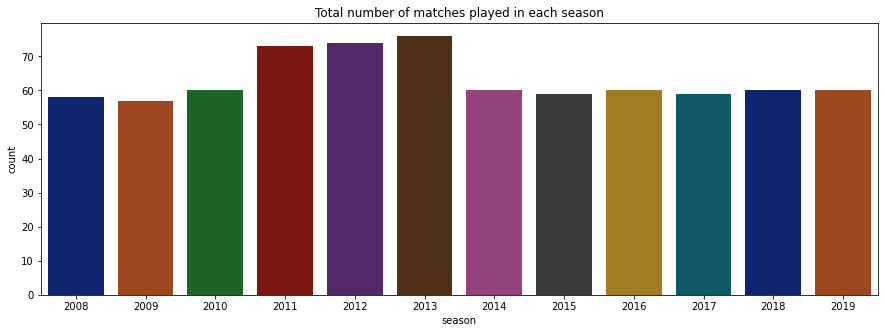

In [7]:
plt.subplots(figsize = (15,5))
sns.countplot(x = 'season' , data = train_data, palette='dark')
plt.title('Total number of matches played in each season')
plt.show()

# Total number of matched won by each team

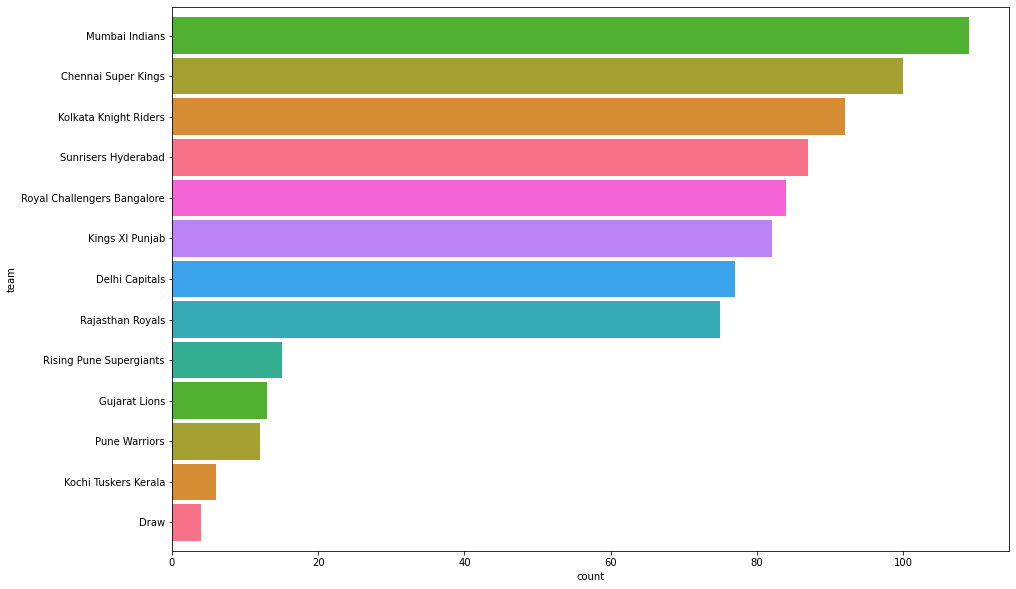

In [8]:
plt.subplots(figsize=(15,10))
ax = train_data['winner'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette("husl", 9))
ax.set_xlabel('count')
ax.set_ylabel('team')
plt.show()

# Total number of matches won at each venue

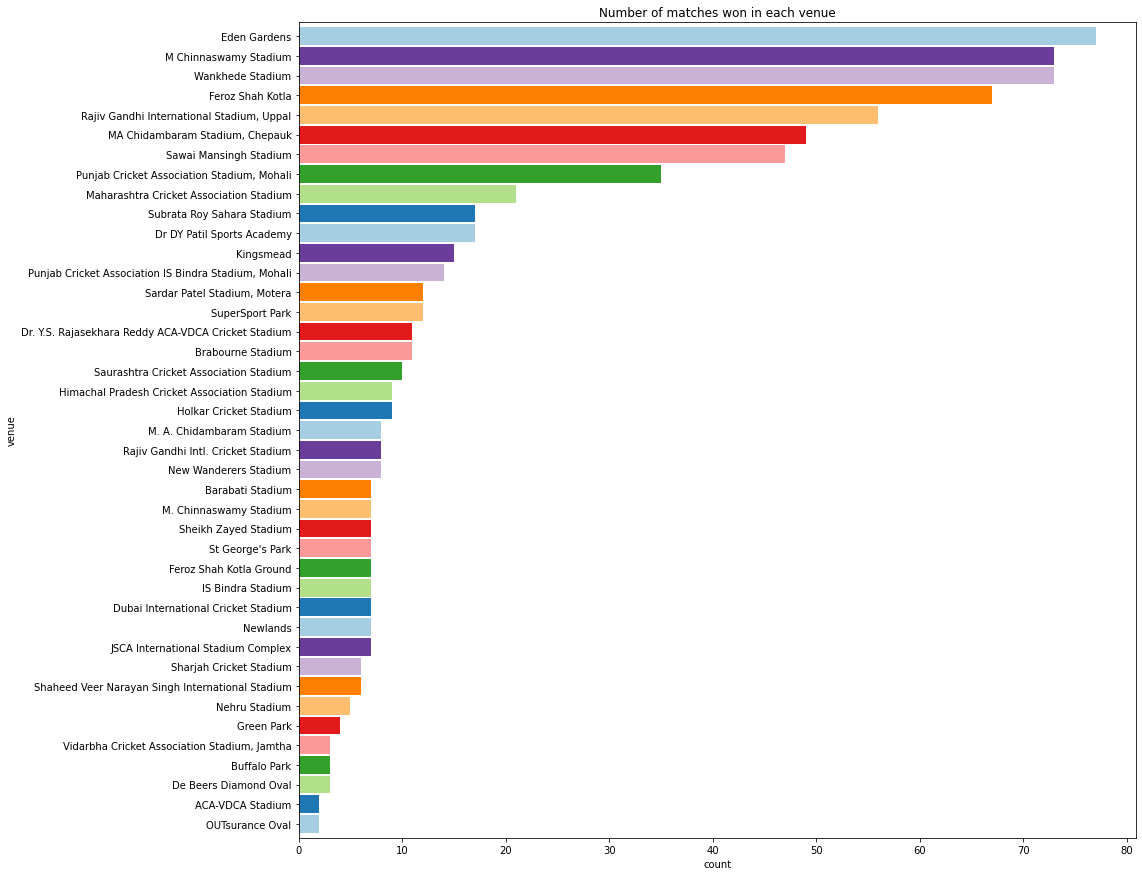

In [9]:
plt.subplots(figsize=(15,15))
ax = train_data['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette("Paired", 10))
ax.set_xlabel('count')
ax.set_ylabel('venue')
plt.title('Number of matches won in each venue')
plt.show()

# Chance of winning both toss and match

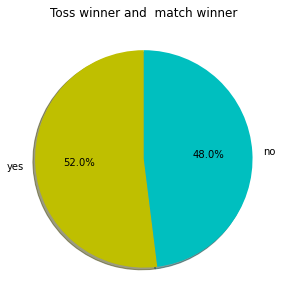

In [10]:
df = train_data[train_data['toss_winner']==train_data['winner']]
ratio = [len(df), (len(train_data)-len(df))]
labels = ['yes', 'no']
plt.pie(ratio, labels=labels, colors=['y', 'c'], autopct='%1.1f%%', shadow=True, startangle=90)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title("Toss winner and  match winner")
plt.show()

# Total number of matches won at each city

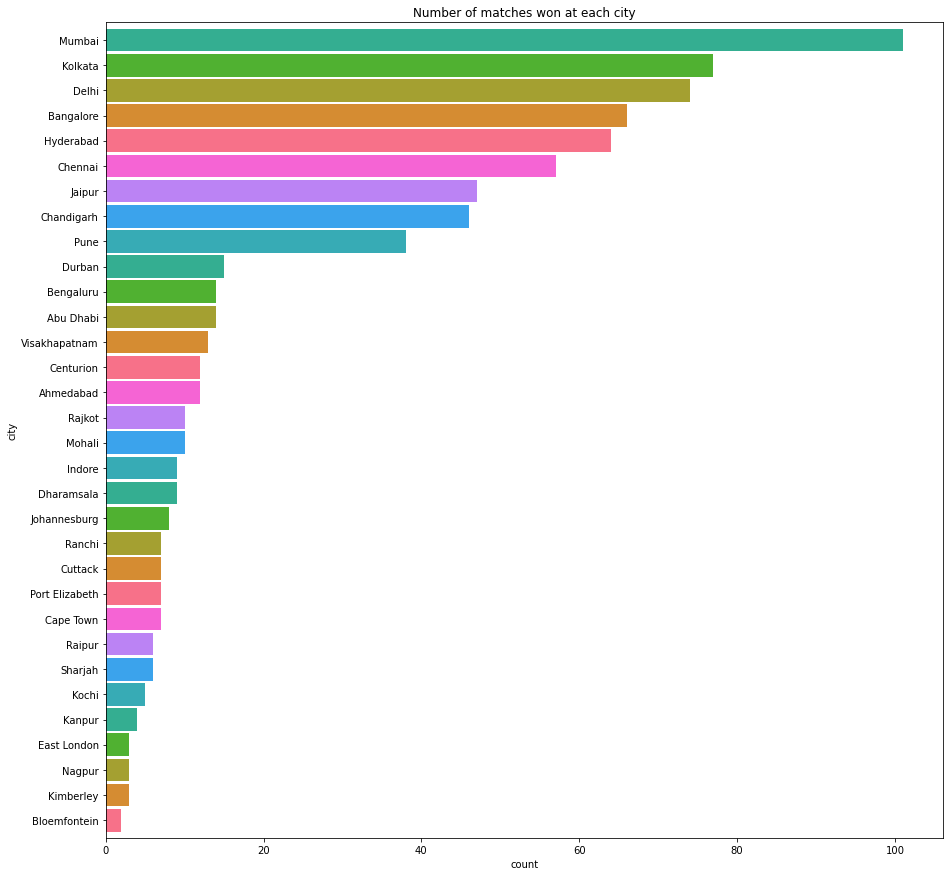

In [11]:
plt.subplots(figsize=(15,15))
ax = train_data['city'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color = sns.color_palette("husl", 9))
ax.set_xlabel('count')
ax.set_ylabel('city')
plt.title('Number of matches won at each city')
plt.show()

In [12]:
train_data.replace({"Mumbai Indians":"MI", "Delhi Capitals":"DC", 
               "Sunrisers Hyderabad":"SRH", "Rajasthan Royals":"RR", 
               "Kolkata Knight Riders":"KKR", "Kings XI Punjab":"KXIP", 
               "Chennai Super Kings":"CSK", "Royal Challengers Bangalore":"RCB",
              "Kochi Tuskers Kerala":"KTK", "Rising Pune Supergiants":"RPS",
              "Gujarat Lions":"GL", "Pune Warriors":"PW"}, inplace=True)


encode = {'team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'toss_winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
          'winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12,'Draw':13}}
train_data.replace(encode, inplace=True)
train_data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,1,7,7,field,normal,0,1,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,2,6,2,bat,normal,0,2,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,3,8,3,bat,normal,0,8,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,4,7,4,bat,normal,0,7,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,5,1,5,bat,normal,0,1,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [13]:
train_data['team1'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 10, 11])

In [14]:
dicVal = encode['winner']
train_data.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,4.984127,5.134921,4.929894,0.025132,4.797619,13.283069,3.350529
std,3464.478148,3.366895,2.723897,2.884128,2.789594,0.156630,2.734144,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,7.000000,7.000000,7.000000,0.000000,7.000000,19.000000,6.000000
max,11415.000000,2019.000000,12.000000,12.000000,12.000000,1.000000,13.000000,146.000000,10.000000


In [15]:
train = train_data[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
train.head(5)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,1,7,Bangalore,field,7,M Chinnaswamy Stadium,1
1,2,6,Chandigarh,bat,2,"Punjab Cricket Association Stadium, Mohali",2
2,3,8,Delhi,bat,3,Feroz Shah Kotla,8
3,4,7,Mumbai,bat,4,Wankhede Stadium,7
4,5,1,Kolkata,bat,5,Eden Gardens,1


In [16]:
df = pd.DataFrame(train)
df.dtypes

team1             int64
team2             int64
city             object
toss_decision    object
toss_winner       int64
venue            object
winner            int64
dtype: object

In [17]:
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

team1            int64
team2            int64
city             int64
toss_decision    int64
toss_winner      int64
venue            int64
winner           int64
dtype: object

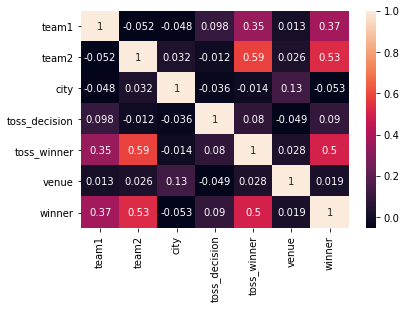

In [18]:
sns.heatmap(df.corr(), annot=True)

In [19]:
X = df[['team1', 'team2', 'venue']]
y = df[['winner']]
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
logistic_model = LogisticRegression()
logistic_model.fit(X,y)
print("Logistic Regression accuracy: ",(logistic_model.score(X,y))*100)
Random_model = RandomForestClassifier()
Random_model.fit(X,y)
print("Random Forest accuracy: ", (Random_model.score(X,y))*100)
xgb_model = XGBClassifier(n_estimators=390, learning_rate=0.1)
xgb_model.fit(X,y)
print("XGB accuracy: ", (xgb_model.score(X,y))*100)
knn_model = KNeighborsClassifier()
knn_model.fit(X,y)
print("KNeighbor Classifier accuracy", (knn_model.score(X,y))*100)
NB_model = GaussianNB()
NB_model.fit(X,y)
print("Gaussion Navie Bayis accuracy: " ,(NB_model.score(X,y))*100)
decision_model = DecisionTreeClassifier()
decision_model.fit(X,y)
print("Decision Tree Classifier accuracy: ", (decision_model.score(X,y))*100)
svm_model=SVC()
svm_model.fit(X,y)
print("SVM accuracy: ", (svm_model.score(X,y))*100)

Logistic Regression accuracy:  25.264550264550266
Random Forest accuracy:  81.48148148148148
XGB accuracy:  81.34920634920636
KNeighbor Classifier accuracy 61.50793650793651
Gaussion Navie Bayis accuracy:  34.78835978835979
Decision Tree Classifier accuracy:  81.48148148148148
SVM accuracy:  50.132275132275126


In [21]:
test_data = pd.read_csv('/kaggle/input/winnerpredictionchallenge/Testset Matches IPL 2020.csv')
test_data.head()

,id,season,city,date,team1,team2,player_of_match,venue,umpire1,umpire2,umpire3
0,1216492,2020,Abu Dhabi,9/19/2020,MI,CSK,AT Rayudu,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
1,1216493,2020,Dubai (DSC),9/20/2020,DC,KXIP,MP Stoinis,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel
2,1216534,2020,Dubai (DSC),9/21/2020,SRH,RCB,YS Chahal,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary
3,1216496,2020,Sharjah,9/22/2020,RR,CSK,SV Samson,Sharjah Cricket Stadium,Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan
4,1216508,2020,Abu Dhabi,9/23/2020,KKR,MI,RG Sharma,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma


In [22]:
encode = {'team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12}}
test_data.replace(encode,inplace=True)
test_data.head()

,id,season,city,date,team1,team2,player_of_match,venue,umpire1,umpire2,umpire3
0,1216492,2020,Abu Dhabi,9/19/2020,4,2,AT Rayudu,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
1,1216493,2020,Dubai (DSC),9/20/2020,8,6,MP Stoinis,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel
2,1216534,2020,Dubai (DSC),9/21/2020,5,7,YS Chahal,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary
3,1216496,2020,Sharjah,9/22/2020,3,2,SV Samson,Sharjah Cricket Stadium,Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan
4,1216508,2020,Abu Dhabi,9/23/2020,1,4,RG Sharma,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma


In [23]:
var_mod = ['venue']
le = LabelEncoder()
for i in var_mod:
    test_data[i] = le.fit_transform(test_data[i])
test_data.dtypes

id                  int64
season              int64
city               object
date               object
team1               int64
team2               int64
player_of_match    object
venue               int64
umpire1            object
umpire2            object
umpire3            object
dtype: object

# Using Random Forest Model

In [24]:
test_X = test_data[['team1','team2','venue']]
test_X = sc.fit_transform(test_X)
y_predict = Random_model.predict(test_X)

In [25]:
newlist = list()
for i in y_predict:
    newlist.append(list(dicVal.keys())[list(dicVal.values()).index(i)]) 

In [26]:
test_data['winner'] = newlist
test_data['venue'] = le.inverse_transform(test_data['venue'])
for i in range(60):
    test_data['team1'][i]=(list(dicVal.keys())[list(dicVal.values()).index(test_data['team1'][i])]) 
    test_data['team2'][i]=(list(dicVal.keys())[list(dicVal.values()).index(test_data['team2'][i])]) 
test_data.loc[test_data["winner"]==test_data["team1"],"winner_team"]=1
test_data.loc[test_data["winner"]!=test_data["team1"],"winner_team"]=2
test_data['win_by_number']=test_data['winner_team'].astype(int)
test_data.head()

,id,season,city,date,team1,team2,player_of_match,venue,umpire1,umpire2,umpire3,winner,winner_team,win_by_number
0,1216492,2020,Abu Dhabi,9/19/2020,MI,CSK,AT Rayudu,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi,CSK,2.0,2
1,1216493,2020,Dubai (DSC),9/20/2020,DC,KXIP,MP Stoinis,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel,RCB,2.0,2
2,1216534,2020,Dubai (DSC),9/21/2020,SRH,RCB,YS Chahal,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary,DC,2.0,2
3,1216496,2020,Sharjah,9/22/2020,RR,CSK,SV Samson,Sharjah Cricket Stadium,Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan,CSK,2.0,2
4,1216508,2020,Abu Dhabi,9/23/2020,KKR,MI,RG Sharma,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma,KKR,1.0,1


In [27]:
match_id = test_data['id']
win_by_number = test_data['win_by_number']
data = pd.DataFrame((zip(match_id,win_by_number)), columns=['id', 'winner'])
data.to_csv('submission.csv',index=False)